# Coal production in mines 2013
by: SDH

Abstract: Analysis and result of analysis

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

sns.set()

## Cleaned data

Data was cleaned in notebook stored in: deliver/data_cleaning.ipynb

In [2]:
df = pd.read_csv('../data/cleaned_coalpublic2013.csv')

# Predict the production of coal mines

## Prepare data to be used by sklearn

In [3]:
features = ['average_employees',
            'labor_hours'
            ]
categoricals = ['mine_state',
                'mine_county',
                'mine_status',
                'mine_type',
                'company_type',
                'operation_type',
                'union_code',
                'coal_supply_region'
                ]
response = 'log_production'

In [4]:
X = df[features + categoricals]
X = pd.get_dummies(X, columns=categoricals, drop_first=True)
y = df[response]

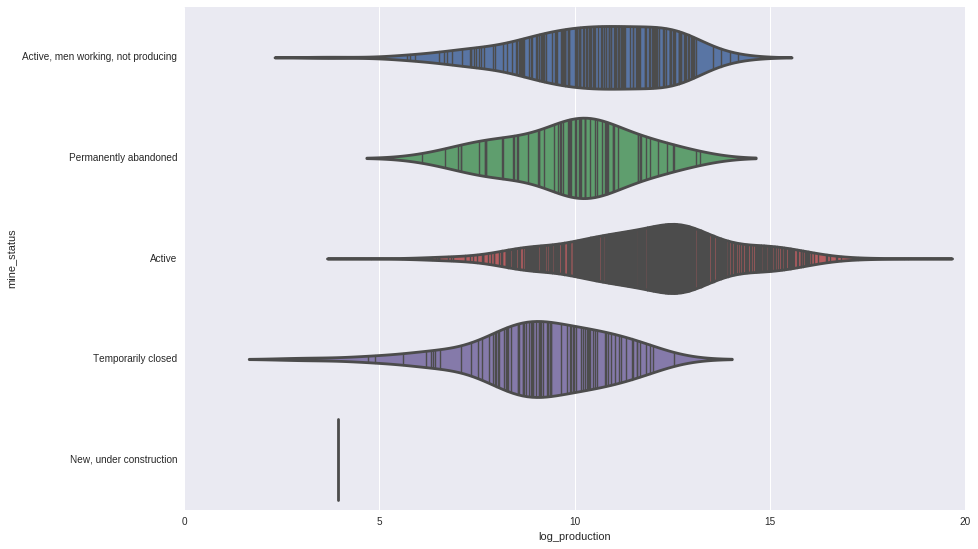

In [5]:
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(x='log_production', y='mine_status', data=df, split=True, inner='stick')

plt.tight_layout()
plt.savefig('../figures/coal_prediction_mine_status_vs_log_production.png')

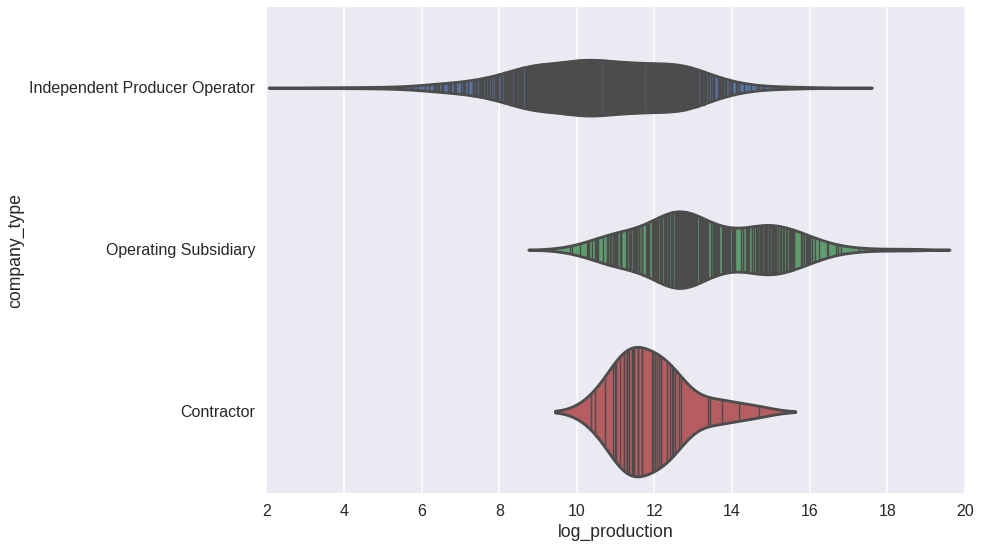

In [6]:
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(x='log_production', y='company_type', data=df, split=True, inner='stick')

plt.tight_layout()
plt.savefig('../figures/coal_production_company_type_vs_log_production.png')

# Random Forest Regressor

## Modeling building flow

- Import model (import statement top of notebook)
- Instantiate
- Fit
- Predict

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [8]:
# Instantiate model
model = RandomForestRegressor(n_estimators=100, oob_score=True)

In [9]:
# Fit model
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [10]:
# Predict
y_pred = model.predict(X_test)

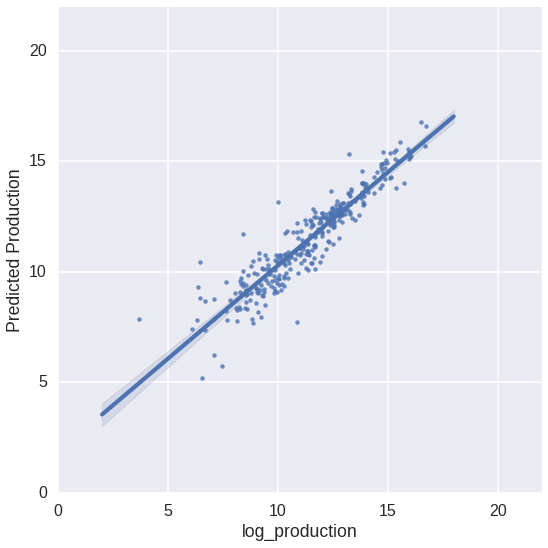

In [11]:
fig = plt.subplots(figsize=(8,8))
sns.regplot(y_test, y_pred)
plt.ylabel('Predicted Production')
plt.xlim(0, 22)
plt.ylim(0, 22)
plt.tight_layout()
plt.savefig('../figures/coal_prediction_random_forest_prediction.png')

In [12]:
print 'R^2 Score: {}'.format(r2_score(y_true=y_test, y_pred=y_pred))
print 'Variance Score: {}'.format(explained_variance_score(y_test, y_pred=y_pred))
print 'Mean Squared Error: {}'.format(mean_squared_error(y_test, y_pred=y_pred))

R^2 Score: 0.861107890468
Variance Score: 0.861902122249
Mean Squared Error: 0.710226702521


In [13]:
model_importances = pd.DataFrame({'name': X.columns,
                                  'importance': model.feature_importances_
                                }).sort_values(by='importance',
                                              ascending=False).reset_index(drop=True)
model_importances.head(5)

,importance,name
0,0.856363,labor_hours
1,0.045218,average_employees
2,0.010097,mine_type_Underground
3,0.006931,coal_supply_region_Powder River Basin
4,0.004147,mine_status_Temporarily closed


# Conclusion

Awesome analysis